In [55]:
from pathlib import Path
import pandas as pd

DATA_PATH = Path("../data/")
PICKLE_PATH = Path("../pickled_data/")

In [56]:
game_plays = pd.read_pickle(PICKLE_PATH / 'game_plays')

In [57]:
# Ensure dateTime is in datetime format
game_plays['dateTime'] = pd.to_datetime(game_plays['dateTime'])

# Filter rows where the year is 2023
game_plays2018 = game_plays[(game_plays['dateTime'].dt.year == 2018) & (game_plays['dateTime'].dt.month == 4) & (game_plays['team_id_for'] == 20)]

# Display the first few rows
print(game_plays2018.head())


              play_id     game_id  team_id_for  team_id_against        event  \
421939   2017021268_4  2017021268         20.0             54.0      Faceoff   
421941   2017021268_6  2017021268         20.0             54.0         Shot   
421943   2017021268_8  2017021268         20.0             54.0  Missed Shot   
421946  2017021268_11  2017021268         20.0             54.0         Shot   
421947  2017021268_12  2017021268         20.0             54.0          Hit   

       secondaryType     x     y  period periodType  periodTime  \
421939           NaN   0.0   0.0       1    REGULAR           0   
421941     Slap Shot -49.0 -35.0       1    REGULAR          23   
421943           NaN -81.0  -3.0       1    REGULAR          39   
421946     Slap Shot -54.0  37.0       1    REGULAR         114   
421947           NaN -97.0   8.0       1    REGULAR         124   

        periodTimeRemaining            dateTime  goals_away  goals_home  \
421939               1200.0 2018-04-08 03

In [58]:
import matplotlib.pyplot as plt

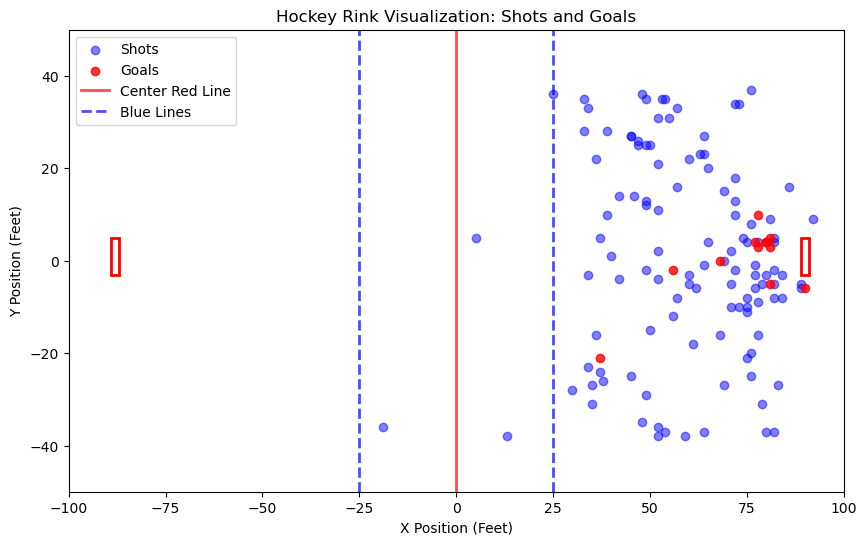

In [67]:
# Function for drawing key rink features. Dimensions from https://www.sportsfeelgoodstories.com/hockey-rink-dimensions-size-diagram/
def draw_rink(ax):
    # Draw the center line
    ax.axvline(0, color='red', linestyle='-', linewidth=2, alpha=0.7, label='Center Red Line')
    
    # Draw the blue lines at +/- 25 feet from center ice
    ax.axvline(-25, color='blue', linestyle='--', linewidth=2, alpha=0.7, label='Blue Lines')
    ax.axvline(25, color='blue', linestyle='--', linewidth=2, alpha=0.7)
    
    # Draw goal as a rectangle

    ax.add_patch(plt.Rectangle((-89, -3), 2, 8, edgecolor='red', facecolor='none', lw=2))  # Left net
    ax.add_patch(plt.Rectangle((89, -3), 2, 8, edgecolor='red', facecolor='none', lw=2))  # Right net

    # Set the rink bounds 
    ax.set_xlim(-100, 100)        
    ax.set_ylim(-50, 50)

# Create the plot
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get the current axes

# Filter shots and goals
shots = game_plays2018[game_plays2018['event'] == 'Shot']
goals = game_plays2018[game_plays2018['event'] == 'Goal']


ax.scatter(shots['st_x'], shots['st_y'], color='blue', alpha=0.5, label='Shots')
ax.scatter(goals['st_x'], goals['st_y'], color='red', alpha=0.8, label='Goals')

# Draw the rink with the custom function
draw_rink(ax)

# Labels and legend
plt.title("Hockey Rink Visualization: Shots and Goals")
plt.xlabel("X Position (Feet)")
plt.ylabel("Y Position (Feet)")
plt.legend()
plt.show()


In [60]:
import plotly.express as px

# Combine shots and goals for plotting
combined = pd.concat([
    shots.assign(event_type='Shot'),
    goals.assign(event_type='Goal')
])

# Plot using Plotly Express
fig = px.scatter(
    combined, 
    x='st_x', 
    y='st_y', 
    color='event_type',
    symbol='event_type',
    title='Shots and Goals (2018 Season)',
    labels={'st_x': 'X Position', 'st_y': 'Y Position'},
    hover_data=['description', 'period', 'dateTime']
)

# Set size of plot and add titles
fig.update_layout(
    width=800,
    height=600,
    xaxis_title="X Position (Rink)",
    yaxis_title="Y Position (Rink)",
    legend_title_text='Event Type'
)

fig.show()